# **Considerações Finais**

3. Descrever mellhor o pycaret
6. Retira os autlais
7. Explicar porque da Normalização em vez da padronização
8. Verificar todos os valores minimos e maximos da normalização

<!--ts-->
   * Melhor setup até agora  
       * Estratégia: Under de 20x e Over de 20x  
       * Modelo: ExtraTrees.
   
   * Comparação mais robusta entre cenários de over e under sampling  
   
   * Fazer um pré-processamento mais atencioso(Considerar tratamento de outliers, normalizações, categorizações etc)
   
   * Análise do problema de acordo com alguma métrica conectada ao négocio (Análise FP vs Fn, matriz de custo etc)
   
   * Considerar técnicas mais robustas para esse próposito: **Near Miss** para undersampling e **SMOTE** (Synthetic Minority Oversampling Technique) para oversampling.      
   * Biblioteca imblearn/pycaret
<!--te-->

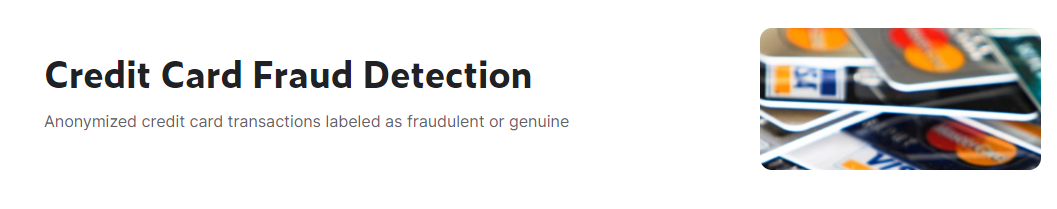

# Objetivo

Esse notebook e destinado a criação de um modelo de previsão para fraude em cartões de crétidos, Os dados utilizados nesse notebook estão disponíveis no [Kaggle](https://www.kaggle.com/) na página [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud). Compete desenvolvemos um sistema de classificação binário com intuito de informa se determinada transação financeira realizada se mostra fraudulentas por meio da base de dados disponível na página do desafio.

# Biblioteca

In [1]:
import pycaret  #Biblioteca para Machine Learning
import matplotlib #Versão do Matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Arquivo txt com as versões das bibliotecas utilizadas nos projeto

In [2]:
f = open('Bibliotecas.txt','w')
f.write('Versões da Bibliotecas utilizadas na construção do Notebook\n')
f.write(f'\nVersão Matplotlib: {matplotlib.__version__}')
f.write(f'\nVersão pycaret: {pycaret.__version__}')
f.write(f'\nVersão pandas: {pd.__version__}')
f.write(f'\nVersão numpy: {np.__version__}')
f.close()

In [3]:
#Texto escrito no arquivo txt
f = open('Bibliotecas.txt','r')
print(f.read())

Versões da Bibliotecas utilizadas na construção do Notebook

Versão Matplotlib: 3.5.2
Versão pycaret: 2.3.10
Versão pandas: 1.4.3
Versão numpy: 1.19.5


# Importação dos dados

In [4]:
#Leitura dos dados
dados = pd.read_csv('C:\\Users\\Mickael\\OneDrive\\Fraude\\creditcard.csv')

In [5]:
#DataFrame do pandas a partir dos dados apresentados, cinco primeiras linhas
dados

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Em `Class` temos a representação dos tipos de transações no cartão de crétido, sendo classificadas bináriamente da seguinte forma:
>0 - **Para transações não fraudulentas**  
>1 - **Para transações fradulentas**

In [6]:
#Contagem dos dados em valores absolutos, não fraudulentos e fraudulentos
dados['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
#Contagem dos dados em valores relativos, não fraudulentos e fraudulentos
dados['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

De acordo com as informações geradas pelas células de código anteriores podemos concluir que 99,83% de todas as transações apresentadas não são fraudulentas a outra pequena parcela 0,17% delas foram consideradas fraudulentas, assim podemos concluir que os dados apresentados tem um grau elevado de desbalanceamento.

Há existencia de classe desbalanceadoas, classes minoritárias e classes majoritárias, classificadas pela qauntidade de dados presente em cada classe, pode nós leva a problema na construção de modelos resultanto em previsões errôneas para além de sermos vítimas do paradoxo da Acurácia.

In [8]:
#Gerando um descrição dos dados
dados.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Percebemos a partir da descrição na célula acima que alguns varíaveis apresentam uma grande dispersão de valores, por exemplo a variável `V7` tem como valor mínimo -43,557 a uma valor maxímo de 120,59. Há existência de diversas varíaveis com intervalos de valores semelhates dificulta o desenvolvimentos dos algoristimos de classificação. Por causa da amplitude alta de diversas variáveis aplicaremos uma transformação com intuito de tornamos os dados mais comportados e simétricos, testaremos os modelos por meio de duas transformações, uma **padronização** e outra por **normalização**, dos dados. Ao final executaremos diversos modelos utilizando os dados padronizados e posterior alteraremos os dados padronizados por ele normalização, com a finalidade de comparamos os diversos resultados é obtemos aquele quer se mostra o mais interessante para esse projeto.

> 1. **Padronização**   
Sendo $X$ o valor que será transfornado, $\mu$ a média e $\sigma$ o desvio padrão dos dados, a padronização do valor $X$ será dados por:

$z = \displaystyle\frac{X - \mu}{\sigma} $ 

Onde o valor $z$ é chamado de z-score.

> 2. **Normalização**
Sendo $X$ o valor que será transformado, $X_{Min}$ o menor valor da série dos dados e $X_{Max}$ o maior valor da série de dados, a normalização do valor $X$ será dado por:

$X^{'}=\displaystyle\frac{X-X_{Min}}{X_{Max}-X_{Min}}$

In [9]:
#Lista com nomes das colunas
colunas = dados.columns.values

#Não inserir Class na normaliza ou padronização
colunas = np.delete(colunas,len(colunas)-1)

#DataFrame vazio padronizado
padronizados = pd.DataFrame()

#DataFrame vazio normalizado
normalizados = pd.DataFrame()

#Inserção dos dados padronizados
for i in colunas:
    mean = dados[i].mean()
    std = dados[i].std()
    padronizados[i] = [(i - mean)/std for i in dados[i]]

#Inserção dos dados normalizadas
for i in colunas:
    i_max = dados[i].max()
    i_min = dados[i].min()
    normalizados[i] = [(i - i_min)/(i_max - i_min) for i in dados[i]]

#Inserir os valores da Class nos DataFrame padronizado e normalizado
normalizados['Class'] = dados['Class']
padronizados['Class'] = dados['Class']

In [10]:
padronizados.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,-6.386744e-18,2.095650e-17,-9.580116e-18,-2.395029e-17,1.397100e-17,4.071549e-17,3.991715e-18,7.185087e-18,-3.991715e-18,6.087365e-18,...,-7.534362e-18,2.155526e-17,4.790058e-18,7.284880e-18,-6.067407e-17,1.258638e-17,2.494822e-18,-7.060346e-18,3.193372e-17,0.001727
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.041527
min,-1.996580e+00,-2.879850e+01,-4.403521e+01,-3.187168e+01,-4.013912e+00,-8.240795e+01,-1.963602e+01,-3.520933e+01,-6.130242e+01,-1.222799e+01,...,-4.741898e+01,-1.506562e+01,-7.175434e+01,-4.683630e+00,-1.975030e+01,-5.401088e+00,-5.590650e+01,-4.674604e+01,-3.532288e-01,0.000000
25%,-8.552105e-01,-4.698909e-01,-3.624701e-01,-5.872131e-01,-5.993777e-01,-5.010677e-01,-5.766811e-01,-4.478852e-01,-1.746801e-01,-5.853621e-01,...,-3.109428e-01,-7.473463e-01,-2.591780e-01,-5.854666e-01,-6.083990e-01,-6.780705e-01,-1.755050e-01,-1.604437e-01,-3.308395e-01,0.000000
50%,-2.131450e-01,9.245335e-03,3.965677e-02,1.186122e-01,-1.401721e-02,-3.936675e-02,-2.058043e-01,3.241718e-02,1.871979e-02,-4.681161e-02,...,-4.009422e-02,9.345360e-03,-1.792417e-02,6.765666e-02,3.183234e-02,-1.081215e-01,3.325168e-03,3.406362e-02,-2.652710e-01,0.000000
75%,9.372158e-01,6.716927e-01,4.867194e-01,6.774557e-01,5.250073e-01,4.433457e-01,2.991620e-01,4.611099e-01,2.740780e-01,5.435296e-01,...,2.537387e-01,7.283347e-01,2.364315e-01,7.257141e-01,6.727994e-01,4.996654e-01,2.255644e-01,2.371521e-01,-4.471699e-02,0.000000
max,1.642055e+00,1.253349e+00,1.335773e+01,6.187982e+00,1.191872e+01,2.521409e+01,5.502005e+01,9.747807e+01,1.675150e+01,1.419492e+01,...,3.703465e+01,1.447302e+01,3.607661e+01,7.569671e+00,1.442529e+01,7.293962e+00,7.831926e+01,1.025432e+02,1.023621e+02,1.000000


In [11]:
normalizados.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,0.548717,0.958294,0.767258,0.837414,0.251930,0.765716,0.263020,0.265356,0.785385,0.462780,...,0.561480,0.510031,0.665434,0.382234,0.577907,0.425448,0.416511,0.313124,0.003439,0.001727
std,0.274828,0.033276,0.017424,0.026275,0.062764,0.009292,0.013395,0.007537,0.012812,0.037846,...,0.011841,0.033854,0.009274,0.081611,0.029261,0.078771,0.007450,0.006698,0.009736,0.041527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313681,0.942658,0.760943,0.821985,0.214311,0.761060,0.255295,0.261980,0.783148,0.440626,...,0.557798,0.484730,0.663030,0.334454,0.560104,0.372036,0.415203,0.312049,0.000218,0.000000
50%,0.490138,0.958601,0.767949,0.840530,0.251050,0.765351,0.260263,0.265600,0.785625,0.461008,...,0.561005,0.510347,0.665267,0.387756,0.578838,0.416932,0.416536,0.313352,0.000856,0.000000
75%,0.806290,0.980645,0.775739,0.855213,0.284882,0.769836,0.267027,0.268831,0.788897,0.483350,...,0.564484,0.534688,0.667626,0.441460,0.597593,0.464807,0.418191,0.314712,0.003004,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Para salvamos os dados normalizados ou padronizados podemos utilizar o comando `pd.to_csv("Nome do arquivo")`, teriamos os seguintes comandos `normalizados.to_csv("normalizados.csv")` ou `padronizados.to_csv("padronizados.csv")`

# Construção do modelo

Para construção do modelos devemos separar os dados disponiveis em dois grupos de dados, DataFrames, um destinado a construção do modelo e outro a sua validação/avaliação do modelo proposto. Devemos ter em mente que ambos grupos de dados devem apresenta a mesma proporção entre dados fraudulentos e não fraudulentos essa admissão simplifica muito o processo de modelagem estatístico. Separaremos os dois grupos por meio de um processo de amostragem estratificada simple acerca disso construiremos uma função que faça a construção dos dois DataFrame a partir da catégoria `Class`.

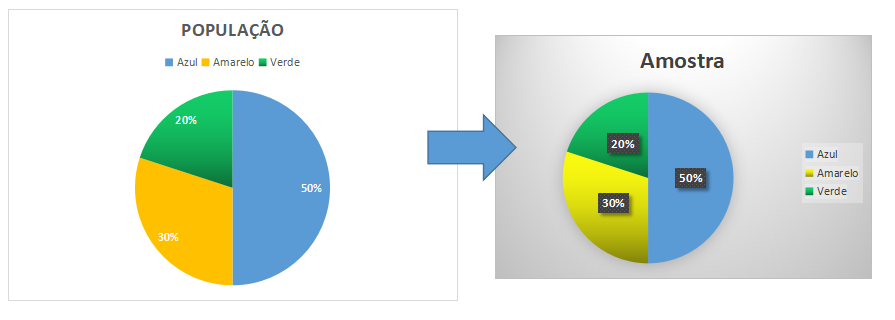

In [12]:
#Função para estratificação dos dados
def estratificacao(dados, tamanho):
    
    #Porcentagem dos dados
    porcentagem = dados["Class"].value_counts("percentual") #Porcentagem da classe
    
    #Tamanho da estratificação
    n = int(tamanho*porcentagem[0]) #Número de dados não fraudulentos
    m = tamanho - n #Número de dados fraudulentos
    
    #Sorteando os dados para estratificação
    zeros = normalizados.query('Class == 0').sample(n) #Sorteando dado não fraudulento
    uns = normalizados.query("Class == 1").sample(m) #Sorteando dado fraudulento
    
    treino = pd.concat([zeros,uns]) #Amostra de dados para construção do modelo
    validacao = dados.drop(treino.index) #Dataframe com dados da base onde se excluir os dados utilizados na amostra
    
    return treino, validacao

O retorno da função `estratificacao(dados,tamanho)` será responsável pela criação das duas bases de dados, uma destinada ao treinamento do modelo e outra para sua validação/avaliação, ambos criado a partir da base de dados original.

In [13]:
#Separação na duas bases, um para treino e outra para validação
treino, validacao = estratificacao(dados, tamanho = 100000) #Escolhendo uma quantidade de 100k de dados para treinamento

In [14]:
#DataFrame para treino do modelo
treino.shape

(100000, 31)

In [15]:
#DataFrame para validação
validacao.shape

(184807, 31)

## Metricas Utilizadas

Por meio da matriz de confusão utilizaremos como referência duas métricas básicas, a **sensibilidade** e **valor preditivo positivo**, iremos combinar as duas por meio de uma média harmônica, **F1 Score**, para decidimos o modelo final.

![Matriz de Confusão.png](https://diegonogare.net/wp-content/uploads/2020/04/matrizConfusao-600x381.png)

**Sensibilidade**, **recall** ou **taxa de verdadeiro positivo**
> $Sensibilidade = \dfrac{TP}{TP+FN}$

A sensibilidade consiste da razão entre a quantidade de valores que o modelo prévio como não fraudulentos pelo total de transações não fraudulentas, isso torna essa métrica muito interessante para utilizamos como classificação do modelo, quanto maior o valor da sensibilidade mais adequando e o algoritmo de decisão.

**Valor Preditivo Positivo** ou **Precisão**
> $\text{Valor Preditivo Positivo} = \dfrac{TP}{TP+FP}$

O valor preditivo positivo consiste da razão do número de valores que o modelo prévio como não fraudulento pelo total de previsões não fraudulenta do modelo, estamos básicamente análisado o percentual de acerto do modelo proposto para transações não fraudulentas, assim quanto maior o valor preditivo melhor o algoritmo de decisão.

**F1-Score** corresponde a média harmônica entre **Sensibilidade** e **Valor Preditivo Positivo**
> $\text{F1-Score} = \dfrac{2}{\dfrac{1}{\text{Sensibilidade}}+\dfrac{1}{\text{Valor Preditivo Positivo}}} = \dfrac{2\cdot\text{Sensibilidade}\cdot\text{Valor Preditivo Positivo}}{\text{Sensibilidade}+\text{Valor Preditivo Positivo}}$

Diante da consideramos nós e interessante um modelo com alta sensibilidade e valor preditivo positivo, podemos combinar essa duas métricas no F1-Score, sendo o F1-Score máximo quando a sensibilidae e valor preditivo positivo apresentam seus valores máximos, 1, por essa caracteristica selecionaremos o F1-Score como métrica definitiva para decisão final do algoritmo.

## Seleção dos dados desbalanceados

As tecnicas *Undersampling* e *Oversampling* são usadas para ajustar a quantidade de dados existente em um dataset para obtermos dados balanceados que serão utilizados para construção de modelos de machine learning.
> **Undersampling** consiste na redução da quantidade de dados apresentados na maior das classe para que a mesma apresente a mesma quantidade na menor classe.

> **Oversampling** consiste no aumento de dados na menor da classe até o ponto que que a mesma apresenta a mesma quantidade de dados dar maior das classes

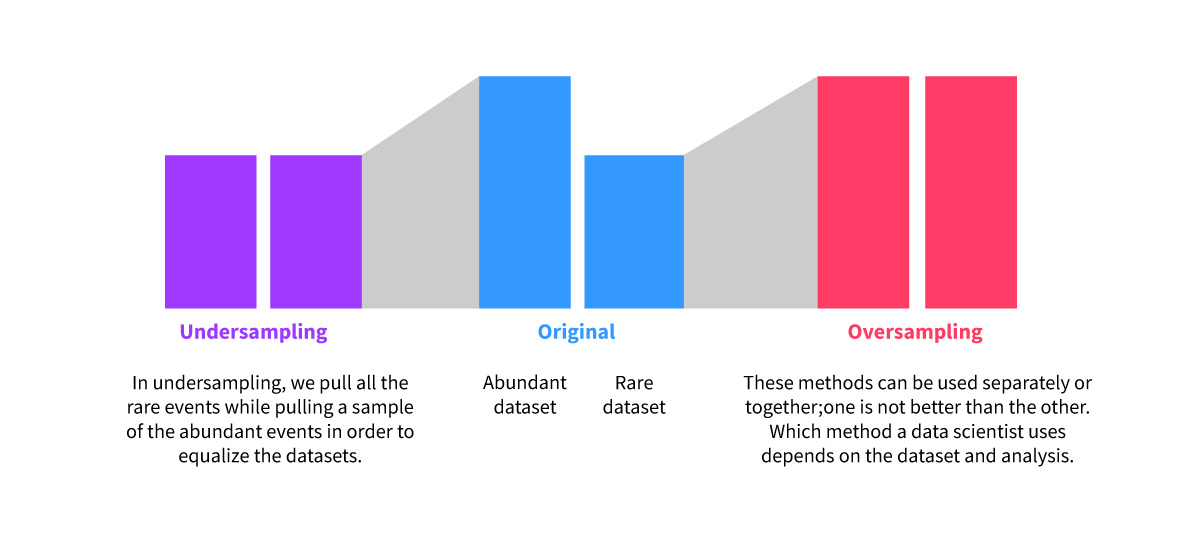
Disponível em: <https://www.mastersindatascience.org/wp-content/uploads/sampling-graphic-2.jpg>

## Undersampling

In [135]:
#Remoção de dados da classe com maior quantidade
def undersampling(dados, under = 0):
    
    #Under corresponde a quantas vezes desejamos tamanho da classe com menor tamanho
    
    #Tamanho da classe com menos dados
    k1 = dados.query("Class == 1") #Seleção de dados com valor de classe 1
    tamanho = len(k1)*under #Definição do tamanho para classe de maior quantidade de dado
    
    #Seleção dos dados
    k0 = dados.query("Class == 0").sample(tamanho) #Seleção de dados com valor de classe 0
    
    #Concatenação
    undersampling = pd.concat([k0,k1])
    
    return undersampling

In [149]:
undersampling(treino, under = 2)["Class"].value_counts()

0    346
1    173
Name: Class, dtype: int64

## Oversampling

In [139]:
#Adição/Repetição dos dados da classe com menor quantidade
def oversampling(dados, over = 0):
    
    #Over corresponde ao tamanho de quantas vezes desejamos o tamanho da classe com maior tamanho
    
    #Tamanho da classe com maior dados
    k0 = dados.query("Class == 0") #Seleção de dados com valor de classe 0
    tamanho = len(k0)*over #Ovar correspond
    
    #Query dos dados da classe de menor quantidade
    #Replace recebe True para permitir um amostragem maior que população, repetição de dados.
    k1 = dados.query("Class == 1").sample(tamanho, replace = True)
    
    #Concatenação
    oversampling = pd.concat([k0,k1])
    
    return oversampling

In [153]:
oversampling(treino, over = 2)["Class"].value_counts()

1    199654
0     99827
Name: Class, dtype: int64

Combinados as funções `undersampling()` e `oversampling()` em uma única função

In [157]:
def UnderOver(dados, under = 0, over = 0):
    
    #Tamanho de undersampling e Oversampling
    k0 = undersampling(dados, under = under)
    k1 = oversampling(dados, over = over)
    
    #Concatenação
    UnderOver = pd.concat([k0,k1])
    
    return UnderOver

In [174]:
UnderOver(treino, under = 1, over = 5)["Class"].value_counts(normalize = True)

1    0.833141
0    0.166859
Name: Class, dtype: float64

In [ ]:
modelagem = setup(data = under, target = "Class", test_data = validacao, normaliza = True)
modelo = compare_models(incluide = modelos, sort = "F1")
pred = predit_model(modelo)

# PyCaret

Utilizando o PyCaret para construção dos modelos de machine learning com objetivo de decisão sobre a operação no cartão de crédito mais informações e documentação disponíveis em:
> [PyCaret Official](https://pycaret.gitbook.io/docs/)  
> [Pycaret](https://pycaret.readthedocs.io/en/latest/)


In [16]:
from pycaret.classification import setup, models, create_model, tune_model

In [17]:
#Modelos considerados nessa analise
modelagem = setup(data = treino,
                 target = "Class",
                 test_data = validacao,
                 normalize = True)

,Description,Value
0,session_id,4380
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(100000, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
#Modelos considerados nessa analise
modelos = ["lr","svm"] #modelos = ["et","rf","lightgbm","dt","lr","svm"]

In [19]:
#Comparação dos modelos selecionados, ordenados por F1-Score
modelo = pycaret.classification.compare_models(include = modelos, sort = "F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9992,0.9747,0.6176,0.8570,0.7145,0.7141,0.7254,1.4190
svm,SVM - Linear Kernel,0.9991,0.0000,0.5882,0.8486,0.6928,0.6924,0.7051,0.1610


In [23]:
#Predição do melhor modelo nos dados de validação
pred = pycaret.classification.predict_model(modelo)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9908,0.5045,0.0157,0.0036,0.0059,0.0031,0.0040


# Refêrências
01.[Amostagem: Teoria e prática usado R](https://amostragemcomr.github.io/livro/index.html)  
02.[Amostragem probabilística: Amostra estratificada](https://www.netquest.com/blog/br/blog/br/amostragem-probabilistica-amostra-estratificada)  
03. [Dados Desbalanceados — O que são e como lidar com eles](https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b#:~:text=Dados%20Desbalanceados%20podem%20ser%20definidos,demais%20categorias%20(classes%20majorit%C3%A1rias).)   
04. [Paradoxo da Acurácia](https://medium.com/turing-talks/paradoxo-da-acur%C3%A1cia-56baa75334f2)  
05. [Como lidar com dados desbalanceados em problemas de classificação](https://medium.com/data-hackers/como-lidar-com-dados-desbalanceados-em-problemas-de-classifica%C3%A7%C3%A3o-17c4d4357ef9)  
06. [Normalizar ou Padronizar as váriaveis](https://medium.com/data-hackers/normalizar-ou-padronizar-as-vari%C3%A1veis-3b619876ccc9)  
07. [Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)  
08. [No free lunch theorem](https://en.wikipedia.org/wiki/No_free_lunch_theorem)  
09. [Undersampling and Oversampling: An old and a new approach](https://medium.com/analytics-vidhya/undersampling-and-oversampling-an-old-and-a-new-approach-4f984a0e8392)  
10. [Oversampling and undersampling in data analysis](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis)  
11. [Análise Exploratória de Dados](https://ealexbarros.medium.com/an%C3%A1lise-explorat%C3%B3ria-de-dados-salvando-dataframes-pandas-em-arquivos-csv-65f7bd643ece#:~:text=Para%20gerar%20esse%20arquivo%20precisamos,aparecer%C3%A1%20no%20menu%20a%20esquerda.)  
12. https://medium.com/horadecodar/como-usar-o-query-do-pandas-fdf4a00727dc  
13. [Média Harmônica](https://pt.wikipedia.org/wiki/M%C3%A9dia_harm%C3%B4nica)  
14. [Entendendo o que é Matriz de Confusão com Python](https://medium.com/data-hackers/entendendo-o-que-%C3%A9-matriz-de-confus%C3%A3o-com-python-114e683ec509)  
15. Matt Harrison. **Machine Learning Guia de Referência Rápida**. Novatec, São Paulo, 2020  
16. Wilton de O. Bussab e Pedro A. Morettin. **Estatística Básica**. 6ª Edição
